<a href="https://colab.research.google.com/github/Shreya030797/ML-Projects/blob/main/Banking_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load python modules

import numpy as np # numpy is a library that allows us to work with vectors and matrices
import matplotlib.pyplot as plt # visualisation library
import pandas as pd # pandas is a library that allows us to work with DataFrames
from google.colab import files
import io
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time as tt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestNeighbors
from scipy import stats
from sklearn.metrics import balanced_accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import warnings
warnings.simplefilter("ignore")

#May delete these later
# We will use a package called spacy, which gets updated frequently
# Make sure to use the following line to ensure you have the latest version!
!pip install --upgrade spacy
# spacy needs language models - let's make sure they are downloaded
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-04-12 15:17:25.027378: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 15:17:26.390350: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
2023-04-12 15:17:39.581664: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operation

In [ ]:
from IPython.display import HTML
def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))


In [ ]:
uploaded = files.upload()    # Will prompt you to select file: remember to choose the right one!
Bankingdata  = pd.read_csv(io.BytesIO(uploaded['Coursework_Banking_Dataset.csv']))

Bankingdata.head()


Saving Coursework_Banking_Dataset.csv to Coursework_Banking_Dataset (1).csv


,text,label,query_index
0,Can I automatically top-up when traveling?,top_up_queries_or_issues,526cd7f17526
1,What kind of fiat currency can I used for hold...,other,f3cf7343067e
2,I did not get the item I ordered. How should ...,other,9a19501c3a3c
3,Freeze my account it's been hacked.,needs_troubleshooting,d76b07db8cf8
4,is there a reason that my payment didnt go thr...,other,bd95ba09a18d


In [ ]:
print(Bankingdata.dtypes)


text           object
label          object
query_index    object
dtype: object


In [ ]:
Bankingdata.shape

(14195, 3)

Exploratory Data Analysis

In [ ]:
Bankingdata.loc[Bankingdata.text=='#','text'] = 'Undefined Query'
Bankingdata.loc[Bankingdata.label == 'Card_queries_or_issues', 'label'] = 'card_queries_or_issues'
Bankingdata.loc[Bankingdata.label == 'Top_up_queries_or_issues', 'label'] = 'top_up_queries_or_issues'
Bankingdata.loc[Bankingdata.label == 'Other', 'label'] = 'other'
Bankingdata.loc[Bankingdata.label == 'Needs_troubleshooting', 'label'] = 'needs_troubleshooting'

Bankingdata = Bankingdata.drop(["query_index"], axis=1)

In [ ]:

print(Bankingdata["label"].isnull().sum())
print(Bankingdata["text"].isnull().sum())

521
0


In [ ]:

Bankingdata_no_nans =  Bankingdata.copy()


#Fit the imputer object to the feature matrix (only for numeric features)
categorical_columns= ['label']

# 1. Imputer
imptr_cat = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

# 2. Fit the imputer object to the feature matrix (only for categorical features)
imptr_cat = imptr_cat.fit(Bankingdata_no_nans[categorical_columns])

Bankingdata_no_nans[categorical_columns] = imptr_cat.transform(Bankingdata_no_nans[categorical_columns])



In [ ]:
#Converting Categorical to numerical data
temp_dataset = Bankingdata_no_nans.copy()

from sklearn.preprocessing import LabelEncoder
lblEncoder_X = LabelEncoder()
temp_dataset['label'] = lblEncoder_X.fit_transform(temp_dataset['label'])
print(temp_dataset['label'].value_counts())

2    5578
1    4312
0    2610
3    1695
Name: label, dtype: int64


In [ ]:
temp_dataset['label'].value_counts()

2    5578
1    4312
0    2610
3    1695
Name: label, dtype: int64

In [ ]:
FinalDataset = temp_dataset

In [ ]:
Train_labels = FinalDataset['label']
Train_labels = Train_labels.to_frame()

Train_Dataset = pd.DataFrame(FinalDataset, columns=['text'])

print(Train_labels.columns)
print(Train_Dataset.columns)

Index(['label'], dtype='object')
Index(['text'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
lblEncoder_Y = LabelEncoder()

train_encoded_labels = lblEncoder_Y.fit_transform(Train_labels['label'])
print(train_encoded_labels)

[3 2 2 ... 0 1 0]


In [ ]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset, train_labels, test_labels = train_test_split(Train_Dataset, Train_labels, test_size= 0.2)

print('Training inputs:')
print(train_dataset)
print('Training labels')
print(test_dataset)

print('Test set inputs')
print(train_labels)
print('Test set labels')
print(test_labels)

#We cannot apply standarization and Normalisation for categorical data.

Training inputs:
                                                    text
11063          I have an unusual payment in my statement
8430              Why has my card payment been reversed?
1111         Can I top-up my card using a bank transfer.
4217   Can you please explain how to transfer money u...
8414   Can you explain the various transaction times ...
...                                                  ...
7025               The app failed to verify my identity.
6931   When did you start charging to make a withdraw...
2951              My top-up is not working. Why is that?
2730   I tried to make a transfer but it failed. will...
464     For the identity verification, what do you need?

[11356 rows x 1 columns]
Training labels
                                                    text
5839           My ATM card isn't working for a withdrawl
2986   Can you tell me why the transfer isn't showing...
4989   Is it normal to have to verify my top-up or is...
2913   Transferring money in 

In [ ]:
# how many labels do we have in the target and what is their distribution?
print('Training split - labels proportions')
print(train_dataset.value_counts(normalize=True))
# is it the same for the test dataset?
print('Test split - labels proportions')
print(test_dataset.value_counts(normalize=True))


Training split - labels proportions
text                                                                
Undefined Query                                                         0.004491
What is the pending payment on my card about?                           0.000264
I won't be pleased unless I get a Mastercard.                           0.000264
Is there a fee to add money to an international card?                   0.000264
What do I do if the ATM took my card?                                   0.000264
                                                                          ...   
I have duplicated transactions on my statement                          0.000088
I have enough money in my account, so why is my card being declined?    0.000088
I have forgotten my passcode                                            0.000088
I have forgotten my passcode to access my app                           0.000088
€1 was in my statement as an extra fee.                                 0.000088
Leng

**Dataset Inspection**

In [ ]:
print(test_dataset.shape)
print(test_labels.shape)

print(train_dataset.columns)
print(train_labels.columns)



(2839, 1)
(2839, 1)
Index(['text'], dtype='object')
Index(['label'], dtype='object')


**Text processing with Spacy**

In [ ]:
import spacy

In [ ]:
train_data = Bankingdata.sample(frac=0.8)
test_data = Bankingdata.drop(train_data.index)

print(f"No. of training examples: {train_data.shape[0]}")
print(f"No. of testing examples: {test_data.shape[0]}")

No. of training examples: 11356
No. of testing examples: 2839


In [ ]:

train_data = pd.DataFrame(Bankingdata, columns=['text','label'])
# show first 5 rows
print(train_data.head(5))


                                                text                     label
0         Can I automatically top-up when traveling?  top_up_queries_or_issues
1  What kind of fiat currency can I used for hold...                     other
2  I did not get the item I ordered.  How should ...                     other
3                Freeze my account it's been hacked.     needs_troubleshooting
4  is there a reason that my payment didnt go thr...                     other


In [ ]:

nlp = spacy.load('en_core_web_sm')

In [ ]:
doc= nlp(train_data.iloc[1]['text'])
print('The original document starts with:')
print(train_data.iloc[1]['text'][0:95])
print('')

print("Now let's print its first 12 tokens")
for i,token in enumerate(doc):
  print(f"Token number {i} is: '{token.text}'")
  if i>20:
    break

The original document starts with:
What kind of fiat currency can I used for holding and exchange?

Now let's print its first 12 tokens
Token number 0 is: 'What'
Token number 1 is: 'kind'
Token number 2 is: 'of'
Token number 3 is: 'fiat'
Token number 4 is: 'currency'
Token number 5 is: 'can'
Token number 6 is: 'I'
Token number 7 is: 'used'
Token number 8 is: 'for'
Token number 9 is: 'holding'
Token number 10 is: 'and'
Token number 11 is: 'exchange'
Token number 12 is: '?'


In [ ]:
spacy_stopwords = nlp.Defaults.stop_words
print(f"There are {len(spacy_stopwords)} stopwords in Spacy. These are:")
print(sorted(spacy_stopwords))

There are 326 stopwords in Spacy. These are:
["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'ha

In [ ]:

doc= nlp(train_data.iloc[1]['text'])
print('The original document starts with:')
print(train_data.iloc[2]['text'][0:95])
print('')
print("Now let's print the first 12 tokens and check if they're stopwords")
for i,token in enumerate(doc):
  print(f"The token number {i} is '{token.text}', but is it a stopword? " + ("YES" if token.is_stop else "NO"))
  if i>20:
    break

The original document starts with:
I did not get the item I ordered.  How should I go about this?  Should I just cancel my order o

Now let's print the first 12 tokens and check if they're stopwords
The token number 0 is 'What', but is it a stopword? YES
The token number 1 is 'kind', but is it a stopword? NO
The token number 2 is 'of', but is it a stopword? YES
The token number 3 is 'fiat', but is it a stopword? NO
The token number 4 is 'currency', but is it a stopword? NO
The token number 5 is 'can', but is it a stopword? YES
The token number 6 is 'I', but is it a stopword? YES
The token number 7 is 'used', but is it a stopword? YES
The token number 8 is 'for', but is it a stopword? YES
The token number 9 is 'holding', but is it a stopword? NO
The token number 10 is 'and', but is it a stopword? YES
The token number 11 is 'exchange', but is it a stopword? NO
The token number 12 is '?', but is it a stopword? NO


In [ ]:

doc= nlp(train_data.iloc[2]['text'])

print('The original document starts with:')
print(train_data.iloc[2]['text'][0:95])
print('')

print("Now let's print the first 20 tokens and check if they're punctuation symbols")
for i,token in enumerate(doc):
  print(f"The token number {i} is '{token.text}', but is it a punctuation symbol? " + ("YES" if token.is_punct else "NO"))
  if i>20:
    break

The original document starts with:
I did not get the item I ordered.  How should I go about this?  Should I just cancel my order o

Now let's print the first 20 tokens and check if they're punctuation symbols
The token number 0 is 'I', but is it a punctuation symbol? NO
The token number 1 is 'did', but is it a punctuation symbol? NO
The token number 2 is 'not', but is it a punctuation symbol? NO
The token number 3 is 'get', but is it a punctuation symbol? NO
The token number 4 is 'the', but is it a punctuation symbol? NO
The token number 5 is 'item', but is it a punctuation symbol? NO
The token number 6 is 'I', but is it a punctuation symbol? NO
The token number 7 is 'ordered', but is it a punctuation symbol? NO
The token number 8 is '.', but is it a punctuation symbol? YES
The token number 9 is ' ', but is it a punctuation symbol? NO
The token number 10 is 'How', but is it a punctuation symbol? NO
The token number 11 is 'should', but is it a punctuation symbol? NO
The token number 12 

In [ ]:
# create a Spacy doc
doc= nlp(train_data.iloc[2]['text'])

print('The original document starts with:')
print(train_data.iloc[2]['text'][0:95])
print('')

# check the lemmatized tokens
print("Now let's print the lemmatized version of its first 20 tokens")
for i,token in enumerate(doc):
  print(f"The token and its lemma for token number {i} is: '{token.text}', '{token.lemma_}'")
  if i>20:
    break


The original document starts with:
I did not get the item I ordered.  How should I go about this?  Should I just cancel my order o

Now let's print the lemmatized version of its first 20 tokens
The token and its lemma for token number 0 is: 'I', 'I'
The token and its lemma for token number 1 is: 'did', 'do'
The token and its lemma for token number 2 is: 'not', 'not'
The token and its lemma for token number 3 is: 'get', 'get'
The token and its lemma for token number 4 is: 'the', 'the'
The token and its lemma for token number 5 is: 'item', 'item'
The token and its lemma for token number 6 is: 'I', 'I'
The token and its lemma for token number 7 is: 'ordered', 'order'
The token and its lemma for token number 8 is: '.', '.'
The token and its lemma for token number 9 is: ' ', ' '
The token and its lemma for token number 10 is: 'How', 'how'
The token and its lemma for token number 11 is: 'should', 'should'
The token and its lemma for token number 12 is: 'I', 'I'
The token and its lemma for to

In [ ]:

doc= nlp(train_data.iloc[2]['text'])
processed_tokens_list = []
for token in doc:
  if (token.is_stop) or (token.is_punct):
    pass
  else:
    processed_tokens_list.append(token.lemma_)
processed_doc= ' '.join(processed_tokens_list)

print('Original text:')
print(doc.text)

print()
print('Processed text:')
print(processed_doc)

Original text:
I did not get the item I ordered.  How should I go about this?  Should I just cancel my order or my payment?  Please help me.

Processed text:
item order     cancel order payment   help


In [ ]:
#As we can see lemmmatization and "Remove stop words and punctuations", are counterproductive in this case.

In [ ]:

from time import time
t_start= time()
train_processed = list(nlp.pipe(train_data['text'].iloc[:14196]))
print(f'Processing the entire training data took {time()-t_start:.2f} seconds')


Processing the entire training data took 59.76 seconds


In [ ]:
# we can now iterate through the whole corpus to get a document and then...
for j,doc in enumerate(train_processed):
  #... iterate through each document to get its tokens with their attribute
  for i,token in enumerate(doc):
    print(token.text, token.lemma_)
    if i>3:
      print()
      break
  if j>5:
    break


Can can
I I
automatically automatically
top top
- -

What what
kind kind
of of
fiat fiat
currency currency

I I
did do
not not
get get
the the

Freeze freeze
my my
account account
it it
's be

is be
there there
a a
reason reason
that that

I I
thought think
transfers transfer
were be
free free

Do do
the the
disposable disposable
cards card
have have



In [ ]:
test_processed = list(nlp.pipe(test_data['text'].iloc[:14196]))

In [ ]:
# get the lenght of all processed documents in the training dataset
train_doc_lengths= []
for doc in train_processed:
  train_doc_lengths.append(len(doc.text)) #doc.text contains the whole text of the original document


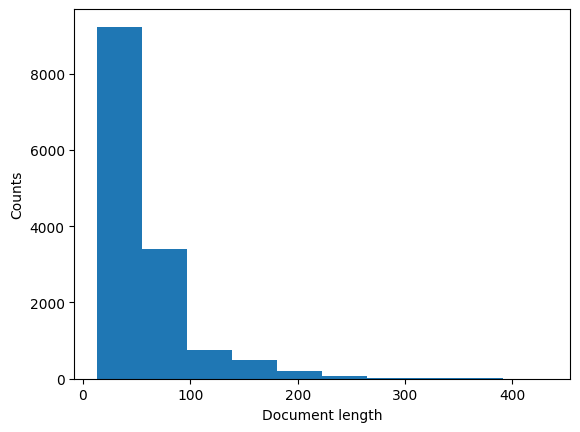

In [ ]:
import matplotlib.pyplot as plt
# plot the distribution of lengths in an histogram
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(train_doc_lengths)
ax.set_xlabel('Document length')
_ =ax.set_ylabel('Counts')


In [ ]:
# get the number of tokens in each document
train_doc_tokens= []
for doc in train_processed:
  train_doc_tokens.append(len(doc)) #the length of a spaCy document is the number of tokens



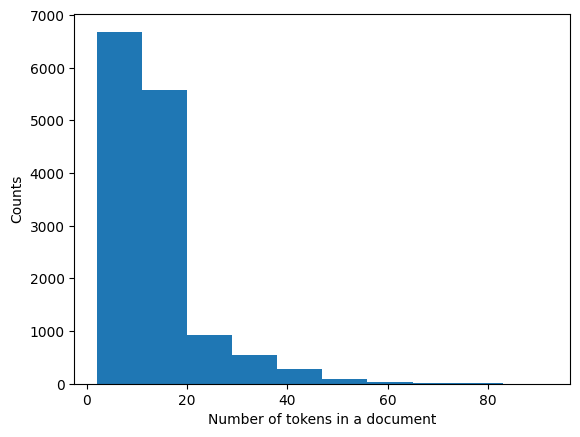

In [ ]:
import matplotlib.pyplot as plt
# plot the distribution of lengths in an histogram
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(train_doc_tokens)
ax.set_xlabel('Number of tokens in a document') #label your axes if you can!
_ =ax.set_ylabel('Counts')


In [ ]:
# let's cycle through the documents again
others_train_doc_tokens= []
card_queries_or_issues_train_doc_tokens= []
needs_troubleshooting_train_doc_tokens = []
top_up_queries_or_issues_train_doc_tokens = []

for i,doc in enumerate(train_processed):
  if train_data.iloc[i]['label']=='other':
    others_train_doc_tokens.append(len(doc))
  elif train_data.iloc[i]['label']=='card_queries_or_issues':
    card_queries_or_issues_train_doc_tokens.append(len(doc))
  elif train_data.iloc[i]['label']=='needs_troubleshooting':
    needs_troubleshooting_train_doc_tokens.append(len(doc)) #the length of a spaCy document is the number of tokens
  else:
    top_up_queries_or_issues_train_doc_tokens.append(len(doc))



In [ ]:
train_data.iloc[:14196].label.value_counts()


other                       5057
needs_troubleshooting       4312
card_queries_or_issues      2610
top_up_queries_or_issues    1695
Name: label, dtype: int64

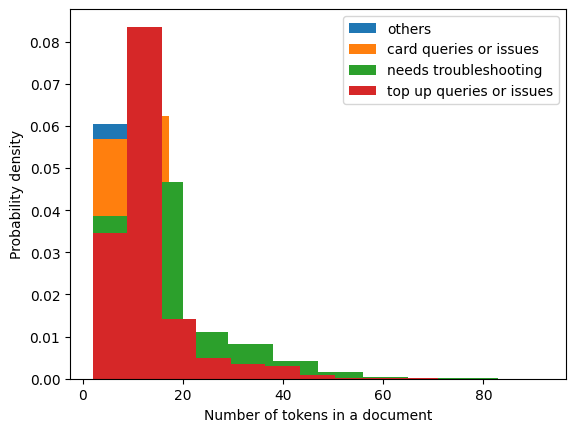

In [ ]:
import matplotlib.pyplot as plt
# plot the distribution of lengths in an histogram
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(others_train_doc_tokens, density=True) # density normalises the histograms so that we can compare two distributions more easily
ax.hist(card_queries_or_issues_train_doc_tokens, density=True)
ax.hist(needs_troubleshooting_train_doc_tokens, density=True)
ax.hist(top_up_queries_or_issues_train_doc_tokens, density=True)
ax.set_xlabel('Number of tokens in a document')
_ =ax.set_ylabel('Probability density')
_= ax.legend(['others','card queries or issues', 'needs troubleshooting', 'top up queries or issues'])


In [ ]:
# get the minimum token length:
print('Minimum number of tokens: ', np.min(train_doc_tokens))
print('Maximum number of tokens: ', np.max(train_doc_tokens))
print()

print('Example of short text:')
# print the first document less than 25 tokens
for i,doc in enumerate(train_processed):
  if len(doc)<25:
    print(doc.text)
    break

print()
print('Example of long text:')
# print the first document more than 1200 tokens
for i,doc in enumerate(train_processed):
  if len(doc)>1200:
    print(doc.text)
    break



Minimum number of tokens:  2
Maximum number of tokens:  92

Example of short text:
Can I automatically top-up when traveling?

Example of long text:


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud

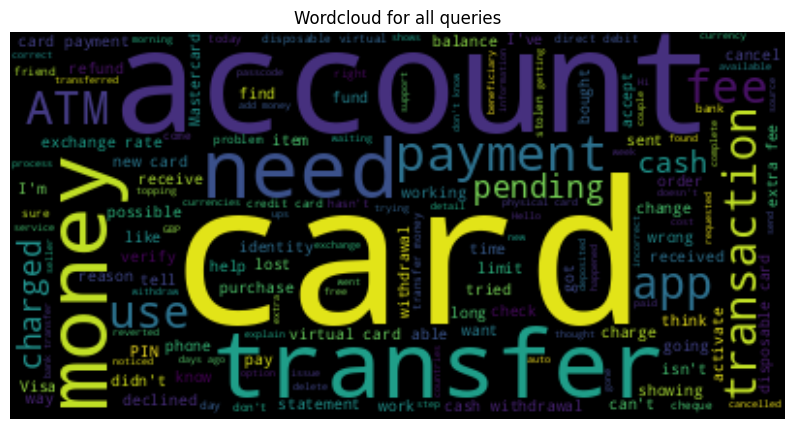

In [ ]:
wordcloud = WordCloud(stopwords = spacy_stopwords).generate(' '.join(train_data['text'].tolist()))
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
_ = plt.title('Wordcloud for all queries')


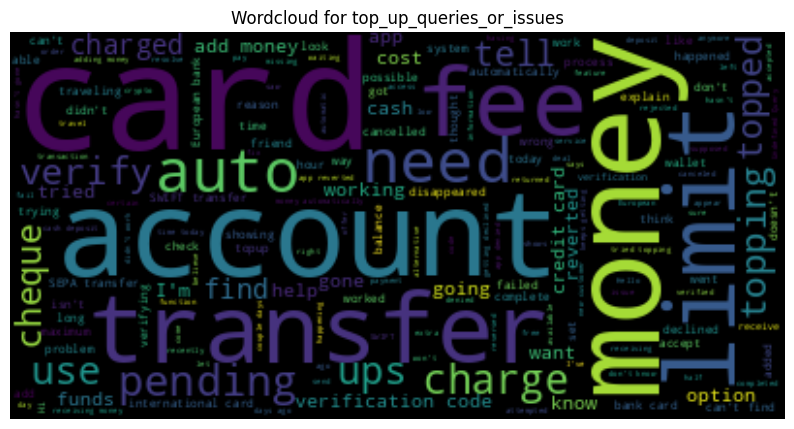

In [ ]:
# card_queries_or_issues queries
pos_wordcloud = WordCloud(stopwords = spacy_stopwords).generate(
    ' '.join(train_data[train_data['label']=='top_up_queries_or_issues']['text'].tolist()))
plt.figure(figsize=[10,10])
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")
_ = plt.title('Wordcloud for top_up_queries_or_issues')


**Logistic Regression and Binary Classification**

In [ ]:

from sklearn.preprocessing import LabelEncoder

lblEncoder_X = LabelEncoder()

temp_dataset['label'] = lblEncoder_X.fit_transform(temp_dataset['label']) # we can fit and transform all at once
print(temp_dataset['label'].value_counts())

2    5578
1    4312
0    2610
3    1695
Name: label, dtype: int64


In [ ]:
df_train, df_test  = train_test_split(temp_dataset, test_size=0.2, random_state=25)

In [ ]:
print(df_train.shape)
print(df_test.shape)

(11356, 2)
(2839, 2)


In [ ]:
df_train['binary_category'] = df_train['label'].apply(lambda x: 1 if x==3 else 0)
df_test['binary_category'] = df_test['label'].apply(lambda x: 1 if x==3 else 0)



In [ ]:
df_train.binary_category.value_counts()



0    9978
1    1378
Name: binary_category, dtype: int64

In [ ]:
# missing values
print(df_train.isna().sum())
print()
print(df_test.isna().sum())


text               0
label              0
binary_category    0
dtype: int64

text               0
label              0
binary_category    0
dtype: int64


In [ ]:
print(df_train.duplicated().sum())
print()
print(df_test.duplicated().sum())

513

41


In [ ]:
# remove duplicates
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

In [ ]:
print(df_train.shape)
print(df_test.shape)

(10843, 3)
(2798, 3)


In [ ]:
# let's create a nice function to process a single text document
def preprocess_text_with_spacy(text_):
  """
  This function takes a Spacy doc and returns the list of its lemmas,
  after removing stop words and punctuations
  """
  # process document with Spacy
  # Note that if we were to first run all the documents through Spacy
  # (remember the nlp.pipe()) it would be faster because Spacy processes
  # multiple documents in parallel. However we'd have to create an intermediate
  # variable or column where to store all the Spacy objects, then process them
  # one by one and add the results to our dataframe
  doc_ = nlp(text_)
  return [token.lemma_ for token in doc_ if not (token.is_stop or token.is_punct)]

In [ ]:
# tokenize training data

t0 = tt()
df_train['tokenized_text'] = df_train['text'].apply(preprocess_text_with_spacy)
print(f'Time elapsed is {(tt()-t0):.2f} seconds')


Time elapsed is 136.20 seconds


In [ ]:
t0 = tt()
df_test['tokenized_text'] = df_test['text'].apply(preprocess_text_with_spacy)
print(f'Time elapsed is {(tt()-t0):.2f} seconds')

Time elapsed is 33.36 seconds


EDA for Text Data

In [ ]:
# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# create a tokenizer that leaves documents already tokenized as they are:
def tokenize_as_is(x):
  ''' x is a list of tokens. It's returned as is'''
  return x

# define a function to get the most frequent ngrams
def get_top_ngram(spacy_tokenized_corpus, ngram_range=(1,2), top_n= 50):
    '''
    The input is a collection of text documents, each represented by a list of tokens
    Exactly what we get out of the Spacy preprocessing
    By default it return the top 50 unigrams/bigrams
    '''
    # Let's create our CountVectorizer object
    # We set lowercase= False because we don't need to make tokens lowercase again
    # Since we know we will be using text that has already been tokenized, we need
    # to create our own tokenizer that, basically, does nothing!
    # This is why the tokenizer is the identity function (lambda x: x) whose
    # output is exactly the same as its input (no change needed!)
    # We set max_features to "top_n" because we only want the most common n-grams
    # ngram_range=(1,2) means that we ask CountVectorizer to create unigrams and bi-grams
    vec = CountVectorizer(ngram_range=ngram_range, max_features=top_n, lowercase=False,
                          tokenizer=lambda x: x)
    # We fit the CountVectorizer to our corpus - this function creates the vocabulary
    # and counts how often each n-gram appears
    vec.fit(spacy_tokenized_corpus)
    # get a vector for each document
    bag_of_words = vec.transform(spacy_tokenized_corpus)
    # sum across documents
    sum_words = bag_of_words.sum(axis=0)
    # get the words with their frequencies
    # the attribute .vocabulary stores all the n-grams in the vocabulary, indexed by a number
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    # sort them by frequency
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    # return the results
    return bag_of_words, words_freq


<Axes: >

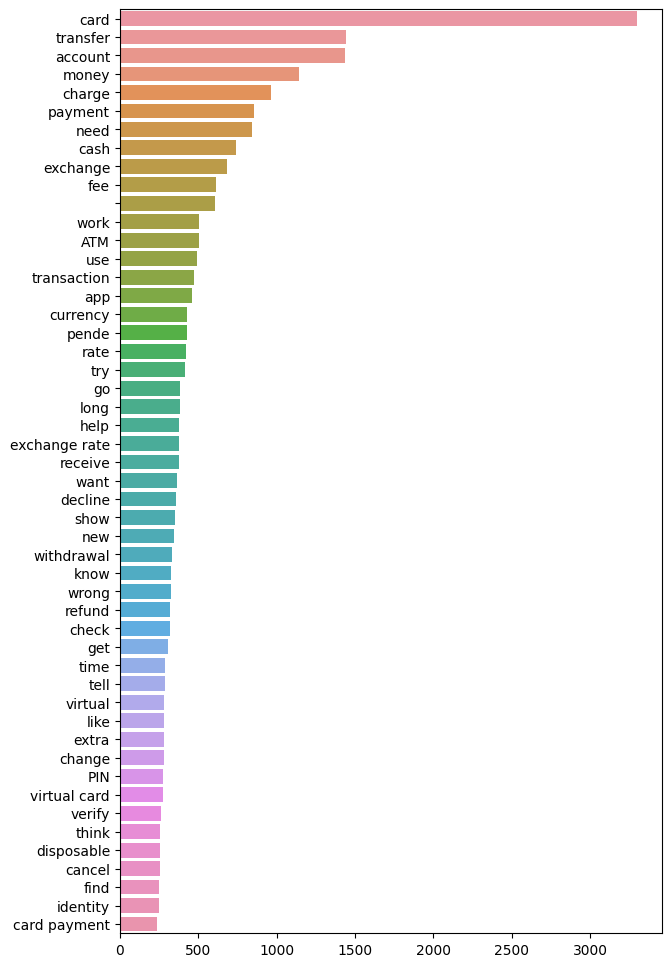

In [ ]:
# let's get the words frequencies
bag_of_words, words_freq= get_top_ngram(df_train['tokenized_text'], ngram_range=(1,2), top_n= 50)

# let's plot them
import seaborn as sns
# separate the n_grams from their frequencies
ngram_labels = [word[0] for word in words_freq]
ngram_freqs = [word[1] for word in words_freq]
plt.figure(figsize=(7,12))
sns.barplot(x=ngram_freqs,y=ngram_labels)


In [ ]:
words_freq[:15]

[('card', 3296),
 ('transfer', 1441),
 ('account', 1435),
 ('money', 1146),
 ('charge', 965),
 ('payment', 856),
 ('need', 845),
 ('cash', 738),
 ('exchange', 685),
 ('fee', 611),
 (' ', 605),
 ('work', 508),
 ('ATM', 504),
 ('use', 493),
 ('transaction', 471)]

In [ ]:
_= df_train['tokenized_text'].map(lambda x: [t for t in x if t!='\n'])
# do the same on the test data

In [ ]:
bad_tokens = [t[0] for t in words_freq[:12]]

In [ ]:
df_train['tokenized_text']= df_train['tokenized_text'].map(lambda x:
                                                           [t for t in x if t not in bad_tokens])
# let's also remove any token that contains a newline or a tab character
df_train['tokenized_text']= df_train['tokenized_text'].map(lambda x:
                                                           [t for t in x if not ('\n' in t)])
df_train['tokenized_text']= df_train['tokenized_text'].map(lambda x:
                                                           [t for t in x if not ('\t' in t)])

<Axes: >

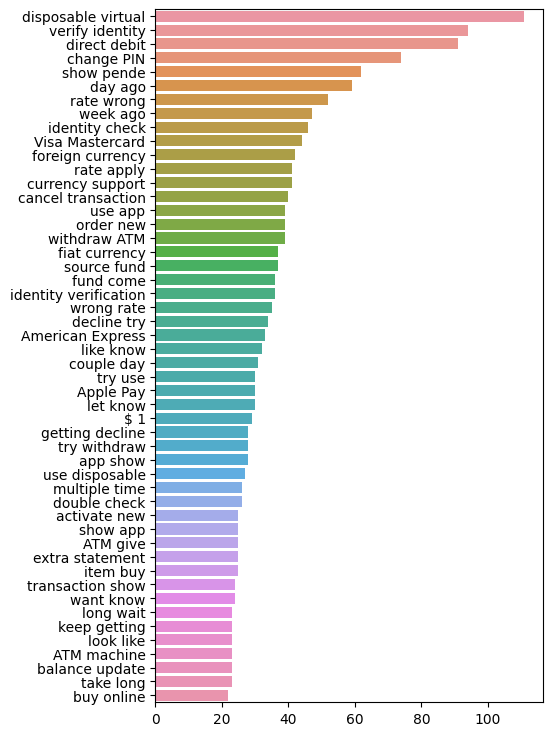

In [ ]:
# Most common bigrams for sci.med articles
_, pos_bigram_freq= get_top_ngram(df_train.loc[df_train['binary_category']==0,'tokenized_text'],
                                  ngram_range=(2,2), top_n= 50)

# let's plot them
# separate the n_grams from their frequencies
# let's temporarily remove the spurious newline character since we know it's there (but let's make it obvious)
pos_bigram_labels = [word[0] for word in pos_bigram_freq]
pos_bigram_freqs = [word[1] for word in pos_bigram_freq]
plt.figure(figsize=(5,9))
sns.barplot(x=pos_bigram_freqs,y=pos_bigram_labels)


<Axes: >

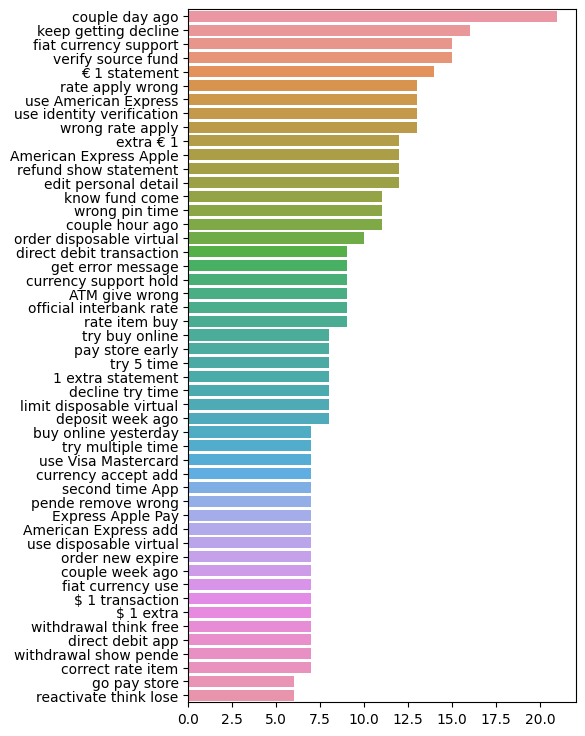

In [ ]:

# Most common bigrams for the other news article
_, neg_trigram_freq= get_top_ngram(df_train.loc[df_train['binary_category']==0,'tokenized_text'],
                                  ngram_range=(3,3), top_n= 50)

# let's plot them
# separate the n_grams from their frequencies
neg_trigram_labels = [word[0] for word in neg_trigram_freq]
neg_trigram_freqs = [word[1] for word in neg_trigram_freq]
plt.figure(figsize=(5,9))
sns.barplot(x=neg_trigram_freqs,y=neg_trigram_labels)



 The number of features in the vocabulary is 1685


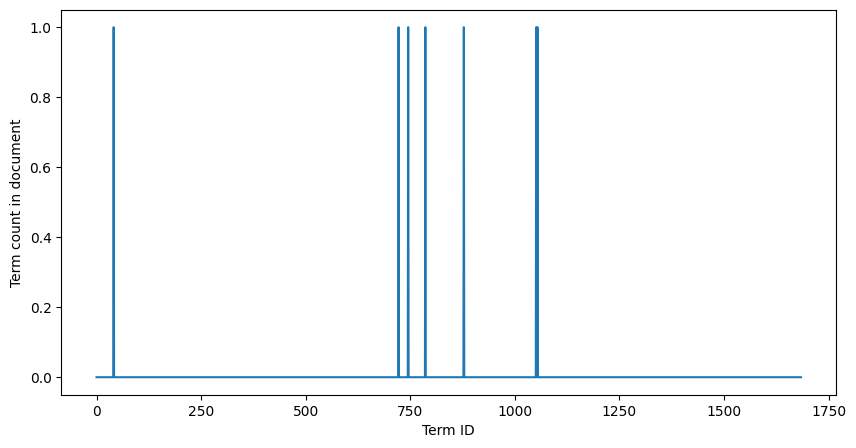

In [ ]:
# BoW model with only unigrams and no exclusion for common and rare tokens
# remember that everything is already lowercases and tokenized
BoW1 = CountVectorizer(ngram_range=(1,1), lowercase=False, tokenizer=lambda x: x)
# get the document-term matrix
BoW_matrix = BoW1.fit_transform(df_train['tokenized_text'])

# how many features do we have
print(f"\n The number of features in the vocabulary is {BoW_matrix.shape[1]}")

# let's plot the BoW vector for one of the documents
fig = plt.figure(figsize =(10,5))
ax=fig.add_subplot(1,1,1)
_=ax.plot(BoW_matrix[1].toarray().T)
ax.set_xlabel('Term ID')
_=ax.set_ylabel('Term count in document')

In [ ]:
BoW1.get_feature_names_out()[:30]

array(['  ', '   ', '$', '.Can', '.Is', '.Never', '.The', '1', '1.00',
       '10', '100', '13', '16', '17', '18', '1818', '1l', '1st', '1£.',
       '2', '20', '20.00', '200', '200,000', '2018', '3', '30', '3d',
       '40', '45'], dtype=object)

In [ ]:
# Let's create another BoW model
BoW2 = CountVectorizer(ngram_range=(1,1), lowercase=False, tokenizer=lambda x: x,
                       min_df=20, max_df=0.5).fit(df_train['tokenized_text'])

# how many features do we have
print(f"\n The number of features in the vocabulary is {len(BoW2.get_feature_names_out())}")

# Let's see the features
BoW2.get_feature_names_out()[:30]


 The number of features in the vocabulary is 291


array(['$', '1', '10', '2', 'ATM', 'American', 'App', 'Apple', 'China',
       'EU', 'Europe', 'Express', 'GBP', 'Google', 'ID', 'Mastercard',
       'PIN', 'Pay', 'SEPA', 'UK', 'Visa', 'able', 'abroad', 'accept',
       'access', 'activate', 'actually', 'add', 'additional', 'address'],
      dtype=object)

In [ ]:
# Let's create another BoW model, with bigrams and no threshold
BoW3 = CountVectorizer(ngram_range=(1,2), lowercase=False, tokenizer=tokenize_as_is,
                       min_df=0, max_df=1).fit(df_train['tokenized_text'])

# how many features do we have?
print(f"\n The number of features in the vocabulary is {len(BoW3.get_feature_names_out())}\n")



 The number of features in the vocabulary is 8829



In [ ]:
# Let's create another BoW model
BoW4 = CountVectorizer(ngram_range=(1,2), lowercase=False, tokenizer=tokenize_as_is,
                       min_df=10, max_df=0.5).fit(df_train['tokenized_text'])

# how many features do we have
print(f"\n The number of features in the vocabulary is {len(BoW4.get_feature_names_out())}\n")



 The number of features in the vocabulary is 702



In [ ]:
#### YOUR CODE HERE #####
# Let's create another BoW model, with unigrams, bigrams and trigrams
BoW5 = CountVectorizer(ngram_range=(1,3), lowercase=False, tokenizer=tokenize_as_is,
                       min_df=10, max_df=0.5).fit(df_train['tokenized_text'])

# how many features do we have
print(f"\n The number of features in the vocabulary is {len(BoW5.get_feature_names_out())}\n")




 The number of features in the vocabulary is 722



In [ ]:
vectorizer = TfidfVectorizer(max_df=0.5, min_df= 10, #stop_words="english", #we could add a stop-word removal step if we wanted to
                             ngram_range= (1,1),
                             lowercase= False, # this is also needed because we can't lowercase a list
                             tokenizer = lambda x: x)

# fit on and apply to training data
X_train = vectorizer.fit_transform(df_train['tokenized_text'])

# apply to test data
X_test = vectorizer.transform(df_test['tokenized_text'])



**Dimensionality Reduction**

**Binary Classification**

In [ ]:
# extract the binary target
y_train = df_train['binary_category']
y_test = df_test['binary_category']
#y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# hyper-parameter tuning using in-built GridSearchCV
# This may take a while: good to set the max_iter parameter as well...
param_grid={'eta0': np.logspace(-6,-1,5),
           'learning_rate': ['constant', 'invscaling','adaptive'], # different strategies for the learning rate across iterations, check documentations for more details
          'max_iter': [10000]} #we set this low to speed things up

# as mentioned, we force the loss function to prioritize correct predictions
# for the minority class: this is done by setting class_weight='balanced'
# Also, we need to set loss= 'log' (or 'log_loss') to get the standard Logistic Regression
lr = SGDClassifier(loss= 'log', class_weight='balanced')

# refer to sklearn documentation for more details:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# cv means how many folds we use for the cross validation
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=10, scoring='accuracy', refit=True)
grid = grid.fit(X_train, y_train)

# after performing the hyper-parameter search, we can show the results
print('Best estimator: {}\nWeights: {}, Intercept: {}\nBest params: {}'.format(
    grid.best_estimator_, grid.best_estimator_.coef_, grid.best_estimator_.intercept_,grid.best_params_))



Best estimator: SGDClassifier(class_weight='balanced', eta0=0.005623413251903491,
              learning_rate='adaptive', loss='log', max_iter=10000)
Weights: [[-1.04655988e+00 -1.22614948e+00 -2.22963221e-01 -3.45209618e-01
  -5.44733089e-01 -3.15714939e-01  9.71485225e-02 -6.47156343e-01
  -2.86910940e-01 -4.14092812e+00 -5.24197430e-01 -9.35455392e-01
  -6.66348528e-01 -1.31877864e+00 -1.27954626e+00 -8.89938805e-01
  -8.66526003e-01 -1.02995378e+00 -9.35455392e-01 -2.80936618e-01
  -1.37480554e+00 -9.93980645e-01 -3.73140740e-01 -1.86844706e-01
  -1.30624886e+00 -2.80397832e-01 -1.71956905e+00 -1.86844706e-01
  -3.39265298e+00 -1.33936004e+00  3.09972825e+00  2.59828139e+00
  -1.96755393e-01 -1.68041466e+00 -1.92110903e+00 -4.15373039e-01
   2.34819851e-01 -7.75867579e-01 -5.45272924e-01  4.34235795e-01
  -3.31971617e-01 -2.34200899e+00 -8.65782169e-01 -6.23678671e-01
  -6.53099962e-01  2.54149675e+00 -9.77250087e-01 -8.10855992e-01
  -1.77288041e+00 -9.36268599e-01 -5.26260355e-01

In [ ]:
def evaluate_classifier(grid, X_train, y_train, X_test, y_test):
    # model evaluation for training set
    y_train_predict = grid.predict(X_train)
    print("Training SET")
    print("--------------------------------------")
    print(f'Accuracy: {accuracy_score(y_train, y_train_predict):.3f}')

    # model evaluation for testing set
    y_test_predict = grid.predict(X_test)

    print("\nTesting SET")
    print("--------------------------------------")
    print(f'Accuracy: {accuracy_score(y_test, y_test_predict):.3f}')
    return y_train_predict, y_test_predict

y_train_predict, y_test_predict = evaluate_classifier(grid, X_train, y_train, X_test, y_test)

Training SET
--------------------------------------
Accuracy: 0.875

Testing SET
--------------------------------------
Accuracy: 0.862


In [ ]:
#The class imbalance - if our accuracy is only as good as the frequency of the most common class,
#then it's probably no good!,Is the accuracy higher than the fraction of majority class points? In this case no, as majority class point is 0.88 and accuracy is 0.87 and 0.86.

df_test['binary_category'].value_counts(normalize=True)

0    0.888134
1    0.111866
Name: binary_category, dtype: float64

**bigrams in our Tfidf Vectorizer**

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.5, min_df= 10, #stop_words="english",
                             lowercase= False,
                             tokenizer= lambda x: x,
                             ngram_range= (1,2))
# fit on and apply to training data
X_train_bigram = vectorizer.fit_transform(df_train['tokenized_text'])
# apply to test data
X_test_bigram = vectorizer.transform(df_test['tokenized_text'])

#print the number of features
print(X_train_bigram.shape[1])

# print average number of non-zero features for each document
print(X_train_bigram.nnz / float(X_train_bigram.shape[0]))


702
3.2470718435857235


In [ ]:
# set the parameters to try
param_grid_bigram_lr={'eta0': np.logspace(-6,-1,5), #inverse of regularization strength
                   'learning_rate': ['constant','invscaling','adaptive'],
          'max_iter': [10000]}

# create the classifier
bigram_lr = SGDClassifier(class_weight='balanced')

# train and search with GridSearchCV
grid_bigram_lr = GridSearchCV(estimator=bigram_lr, param_grid=param_grid,
                    cv=10, scoring='accuracy', refit=True)
grid_bigram_lr = grid_bigram_lr.fit(X_train_bigram, y_train)
print('Best estimator: {}\n Intercept: {}\nBest params: {}'.format(grid_bigram_lr.best_estimator_,
                                                                                           grid_bigram_lr.best_estimator_.intercept_,
                                                                                           grid_bigram_lr.best_params_))
print('Available parameters for the estimator (fine-tuning): ',bigram_lr.get_params().keys())

y_train_predict, y_test_predict = evaluate_classifier(grid_bigram_lr, X_train_bigram, y_train, X_test_bigram, y_test)



Best estimator: SGDClassifier(class_weight='balanced', eta0=0.00031622776601683794,
              learning_rate='adaptive', max_iter=10000)
 Intercept: [-0.21057137]
Best params: {'eta0': 0.00031622776601683794, 'learning_rate': 'adaptive', 'max_iter': 10000}
Available parameters for the estimator (fine-tuning):  dict_keys(['alpha', 'average', 'class_weight', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'n_jobs', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
Training SET
--------------------------------------
Accuracy: 0.889

Testing SET
--------------------------------------
Accuracy: 0.873


Accuracy has increased using Bigrams, didn't get the Hyper parameter same as before.


**MultiClass Classification**

In [ ]:
df_train['text']= df_train['text'].map(lambda x: x.replace('\n',''))

# do the same on the test data
df_test['text']= df_test['text'].map(lambda x: x.replace('\n',''))

**n-gram or BoW**

In [ ]:
y_train = df_train['label']
y_test = df_test['label']

In [ ]:
print(df_train.shape)
print(df_test.shape)
print(y_train.shape)
print(y_test.shape)

(10843, 4)
(2798, 4)
(10843,)
(2798,)


In [ ]:
# create custom class to add to the pipeline
from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):
    ''' Pipeline step to transform a sparse matrix into a dense one '''
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.toarray()


Let's create our pipeline with the following steps:

Convert text to BoW model using TfidfVectorizer
Convert BoW model matrix from sparse to dense
Classify text using SGDClassifier
We create the pipeline using a list of tuples. Each tuple is a (name, object) pair, where name is the name we want to assign to the step (use a descriptive name!) and object is the function thatthe step needs to use. We can also specify (some of) the arguments of the function.

So, for example ('tfidf', TfidfVectorizer(stop_words='english', lowercase= True)) means that the first step is called 'tfidf' and what it does is it applies the Tfidf transformation to the text to get the BoW model.

In [ ]:
# Create the pipeline without data balancing
clf_ = Pipeline(
        steps =[('tfidf', TfidfVectorizer(stop_words='english', lowercase= True,
                                          ngram_range=(1,2))),
                ('to_dense', DenseTransformer()), #If you want, you can see the error message you can get if you remove this step - you'll also have to use a different classifier, like RandomForestClassifier
              ('classifier', SGDClassifier(random_state=0)),
      ]
    )



In [ ]:
# Set up the hyper-parameters to test
parameters = {'tfidf__max_features': (2000,10000),
              'classifier__eta0': np.logspace(-5,-1,3), # the initial learning rate value (try printing np.logspace(-6,-1,5) to see what comes up...)
              'classifier__learning_rate': ['constant'],#, 'adaptive'], # different strategies for the learning rate across iterations, check documentations for more details
              'classifier__class_weight': ['balanced', None],
             }


In [ ]:
#for clf_name in [ComplementNB, SGDClassifier, AdaBoostClassifier, RandomForestClassifier]:
# Create the pipeline with data balancing
bal_clf_ = ImbPipeline(
        steps = [('tfidf', TfidfVectorizer(stop_words='english', lowercase= True,
                                           ngram_range=(1,2))),
          ('to_dense', DenseTransformer()),
          ('resampling', RandomOverSampler(random_state=0)),
          ('classifier', SGDClassifier(random_state=0)) #clf_name(random_state=0)
        ]
    )


We set up the hyper-parameters to test in the exact same way

In [ ]:
bal_parameters = {'tfidf__max_features': (2000,10000),
              'classifier__eta0': np.logspace(-5,-1,3), # the initial learning rate value (try printing np.logspace(-6,-1,5) to see what comes up...)
              'classifier__learning_rate': ['constant', 'adaptive'], # different strategies for the learning rate across iterations, check documentations for more details
             }


**CV Search**

Cross-validated GridSearch to get the best hyperparameters.

Note that behind the scenes the function uses StratefiedKFold (documentation here). From sklear: "StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set." This means that every time we split the dataset into training and validation sets, both of them will have approximately the same ratio of classes. Both the balance or the unbalance of classes will be respected.

Note that train_test_split also has a stratify argument that can be used to split a dataset while keeping the same ratio between classes. We would need to pass the target variables to the stratify argument so that it knows how to split the data while maintaining equal ratios.

In [ ]:

# create the GridSearch function
# original data
clf_search = GridSearchCV(clf_, parameters, scoring= "balanced_accuracy", cv= 5) #we use balanced accuracy to reduce the impact of the data imbalance

# Fit all the possible hyper-parameters combinations using cross-validation: it may take some time
# original data
# let's also time it (it's goint to take time, nothing's wrong!)
t0 = tt()

_ =clf_search.fit(df_train['text'], y_train)
print(f'Time taken to train gridsearch: {tt()-t0:.2f} seconds.')



Time taken to train gridsearch: 1794.13 seconds.


In [ ]:
# balanced data
bal_clf_search = GridSearchCV(bal_clf_, bal_parameters, scoring= "balanced_accuracy", cv= 5)

# balanced data
# (it's goint to take time, nothing's wrong!)
t0= tt()

_ =bal_clf_search.fit(df_train['text'], y_train)

print(f'Time taken to train gridsearch: {tt()-t0:.2f} seconds.')

Time taken to train gridsearch: 3009.65 seconds.


In [ ]:
#original data
print(clf_search.best_score_, clf_search.best_params_)

print()

#balanced data
print(bal_clf_search.best_score_, bal_clf_search.best_params_)

0.8542255746554253 {'classifier__class_weight': 'balanced', 'classifier__eta0': 0.1, 'classifier__learning_rate': 'constant', 'tfidf__max_features': 10000}

0.8540566236158622 {'classifier__eta0': 0.1, 'classifier__learning_rate': 'adaptive', 'tfidf__max_features': 10000}


In [ ]:
# original data
clf_cv_results = pd.DataFrame(clf_search.cv_results_)
# balanced data
bal_clf_cv_results = pd.DataFrame(bal_clf_search.cv_results_)


In [ ]:
# let's show the dataframe
print(clf_cv_results.head())

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.735481      0.373629         0.095522        0.019804   
1      35.145816      0.544465         0.181070        0.048372   
2      19.427562      1.481919         0.087315        0.018370   
3      96.140010      0.646102         0.176103        0.037948   
4       4.242927      0.265910         0.094148        0.018444   

  param_classifier__class_weight param_classifier__eta0  \
0                       balanced                0.00001   
1                       balanced                0.00001   
2                       balanced                  0.001   
3                       balanced                  0.001   
4                       balanced                    0.1   

  param_classifier__learning_rate param_tfidf__max_features  \
0                        constant                      2000   
1                        constant                     10000   
2                        constant                    

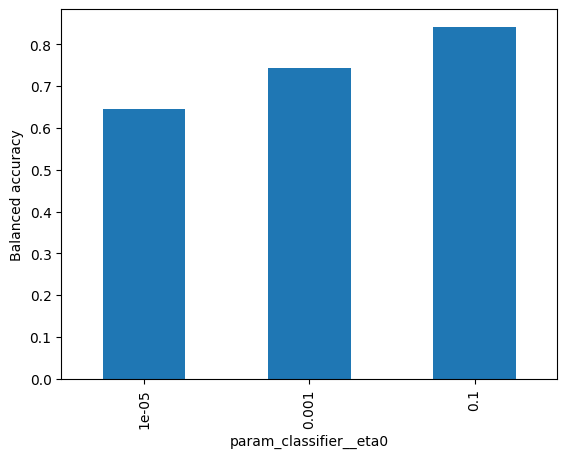

In [ ]:

df_group= clf_cv_results.groupby('param_classifier__eta0')

avg_score = df_group.mean_test_score.agg('mean')
# we plot the results
ax =avg_score.plot(kind='bar')
_ =plt.ylabel('Balanced accuracy')


In [ ]:

fig = ax.get_figure()
# if you don't specify a path, it'll save the figure in the same folder as the notebook
fig.savefig('figure_name.pdf')

**Evaluation**

In [ ]:

best_clf = clf_search.best_estimator_
best_bal_clf = bal_clf_search.best_estimator_


In [ ]:
print('Category names are:')
print(df_test.label)


Category names are:
3434     2
8186     3
13509    0
2851     0
4468     1
        ..
5284     1
7451     2
5952     1
710      1
8084     0
Name: label, Length: 2798, dtype: int64


              precision    recall  f1-score   support

           1       0.30      0.32      0.31      3432
           0       0.19      0.21      0.20      2083
           2       0.39      0.35      0.37      4465
           3       0.12      0.12      0.12      1376

    accuracy                           0.29     11356
   macro avg       0.25      0.25      0.25     11356
weighted avg       0.29      0.29      0.29     11356


 Balanced accuracy is 0.250686345018826


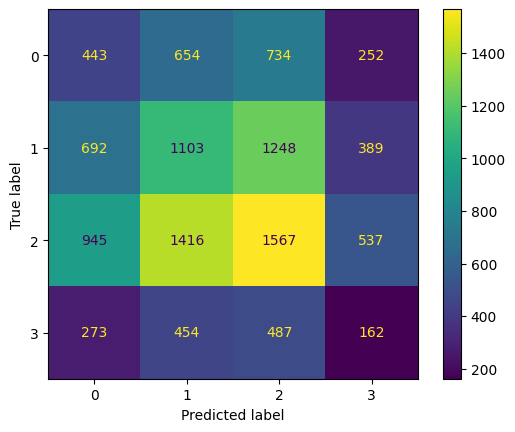

In [ ]:
y_pred = best_clf.predict(df_train['text'].values)

y_test = train_labels['label'].values

# Get unique labels for the confusion matrix
label = train_labels['label'].unique()


print(classification_report(y_test, y_pred, labels = label))
print(f'\n Balanced accuracy is {balanced_accuracy_score(y_test, y_pred)}')

cm= ConfusionMatrixDisplay.from_estimator(best_clf, df_train['text'], y_test)


In [ ]:
temp_dataset

,text,label
0,Can I automatically top-up when traveling?,3
1,What kind of fiat currency can I used for hold...,2
2,I did not get the item I ordered. How should ...,2
3,Freeze my account it's been hacked.,1
4,is there a reason that my payment didnt go thr...,2
...,...,...
14190,Can you tell me what the disposable cards are ...,0
14191,The ATM won't give me my card back. I need it ...,0
14192,Can you please tell me why my card payments ar...,0
14193,The rate for a currency exchange was wrong whe...,1


**Build ANN and test performance**

In [ ]:
train_labels

,label
11063,1
8430,0
1111,2
4217,2
8414,1
...,...
7025,1
6931,1
2951,3
2730,1


In [ ]:
# Create the pipeline without data balancing
preprocessor = Pipeline(
        steps =[('tfidf', TfidfVectorizer(stop_words='english', lowercase= True,
                                          max_features = 3000,
                                          ngram_range=(1,2))),
                ('to_dense', DenseTransformer()),
      ]
    )

In [ ]:
# Preprocess the data
# fit
preprocessor.fit(df_train['text'])
# transform training data
X_train_preprocessed = preprocessor.transform(df_train['text'])
# transform test data
X_test_preprocessed = preprocessor.transform(df_test['text'])


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# let's create a simple model with ONE hidden layer only
model = models.Sequential()
# Created a hidden layer with 50 nodes.
hidden_layer_nodes = 50
num_of_input_features = X_train_preprocessed.shape[1] #number of features = number of columns in the input matrix

# We can specify an input layer to tell Keras what input to expect.
# we tell Keras how many features to expect for each datapoint. This way Keras
# knows how many weights are needed between the input and the first hidden layer
model.add(layers.Input(shape=(num_of_input_features,)))
model.add(layers.Dense(hidden_layer_nodes, activation='relu'))
# let's add a dropout layer
dropout_rate = 0.2
model.add(layers.Dropout(rate= dropout_rate))
num_categories = len(y_train.value_counts())
model.add(layers.Dense(num_categories, activation='softmax')) #is it clear why here we use "sigmoid" and use "softmax" for multi-class problems?

learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), # we use this function for MULTI-CLASS PROBLEMS. It expects the target labels to have been label encoded
              metrics=['accuracy'])

# let's print a summary of the model to see what it's like
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                150050    
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 204       
                                                                 
Total params: 150,254
Trainable params: 150,254
Non-trainable params: 0
_________________________________________________________________
None


**Model Training (Neural Network)**

In [ ]:
# Training
# let's define some relevant hyper-parameters:
batch_size = 130 # The batch size indicates how many data points we use to compute each update to the parameters of the models (based on the gradient of the loss)
epochs = 50 #how long we train the model for
validation_split = 0.2  #Fraction of the training data to be used as validation data.
history = model.fit(X_train_preprocessed,
                    y_train.to_numpy(), #we add .to_numpy() because Keras doesn't like dataframes so we need to transform the target labels into a numpy array
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split= validation_split,
                    )
# note that the output variable "history" keeps track of the model performance at each epoch


Epoch 1/50
67/67 [==============================] - 2s 13ms/step - loss: 1.2625 - accuracy: 0.4912 - val_loss: 1.1166 - val_accuracy: 0.6173
Epoch 2/50
67/67 [==============================] - 1s 9ms/step - loss: 0.9365 - accuracy: 0.7136 - val_loss: 0.8180 - val_accuracy: 0.7529
Epoch 3/50
67/67 [==============================] - 1s 10ms/step - loss: 0.6623 - accuracy: 0.8107 - val_loss: 0.6350 - val_accuracy: 0.7981
Epoch 4/50
67/67 [==============================] - 1s 9ms/step - loss: 0.5058 - accuracy: 0.8572 - val_loss: 0.5433 - val_accuracy: 0.8220
Epoch 5/50
67/67 [==============================] - 1s 10ms/step - loss: 0.4195 - accuracy: 0.8771 - val_loss: 0.4967 - val_accuracy: 0.8285
Epoch 6/50
67/67 [==============================] - 1s 8ms/step - loss: 0.3645 - accuracy: 0.8892 - val_loss: 0.4735 - val_accuracy: 0.8345
Epoch 7/50
67/67 [==============================] - 1s 10ms/step - loss: 0.3321 - accuracy: 0.8972 - val_loss: 0.4607 - val_accuracy: 0.8396
Epoch 8/50
67/67

In [ ]:
# let's see what's within the 'history' variable
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

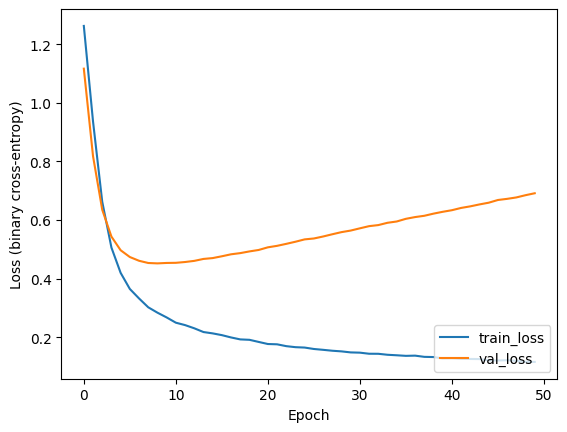

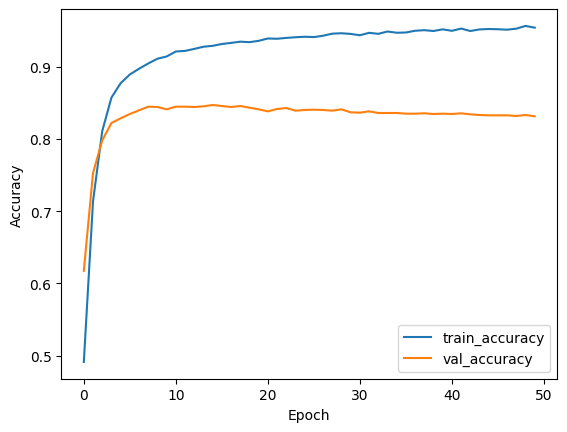

In [ ]:
# Plot training curves for both training and validation data
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (binary cross-entropy)')
plt.legend(loc='lower right')

plt.figure()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


Index(['label'], dtype='object')
Index(['text'], dtype='object')
89/89 [==============================] - 1s 4ms/step
['top_up_queries_or_issues' 'other' 'needs_troubleshooting'
 'card_queries_or_issues']
11555    0
9143     2
2227     2
12233    2
1119     1
        ..
6376     2
5604     1
13454    0
6069     2
2373     3
Name: label, Length: 2839, dtype: int64
(2839, 4)
(2839,)
                          precision    recall  f1-score   support

top_up_queries_or_issues       0.34      0.15      0.21       522
                   other       0.38      0.52      0.44       857
   needs_troubleshooting       0.48      0.47      0.48      1107
  card_queries_or_issues       0.26      0.25      0.26       353

                accuracy                           0.40      2839
               macro avg       0.37      0.35      0.35      2839
            weighted avg       0.40      0.40      0.39      2839

The balanced accuracy score is 0.350



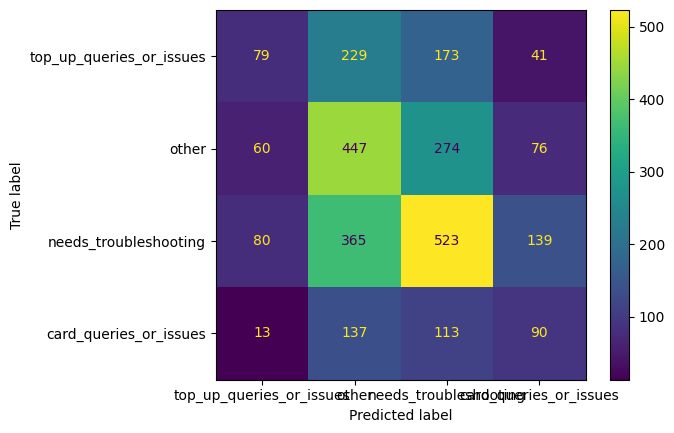

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import balanced_accuracy_score
import numpy as np
# Check performance on test data
Train_labels = FinalDataset['label']
Train_labels = Train_labels.to_frame()

Train_Dataset = pd.DataFrame(FinalDataset, columns=['text'])

print(Train_labels.columns)
print(Train_Dataset.columns)

df_train, df_test, df_train_labels, df_test_labels = train_test_split(Train_Dataset, Train_labels, test_size= 0.2 )

df_train['text']= df_train['text'].map(lambda x: x.replace('\n',''))
df_train['text']= df_train['text'].map(lambda x: x.replace('\t',''))

# do the same on the test data
df_test['text']= df_test['text'].map(lambda x: x.replace('\n',''))
df_test['text']= df_test['text'].map(lambda x: x.replace('\t',''))

y_train = df_train_labels['label']
y_test = df_test_labels['label']

preprocessor.fit(df_train['text'])
# transform training data
X_train_preprocessed = preprocessor.transform(df_train['text'])
# transform test data
X_test_preprocessed = preprocessor.transform(df_test['text'])

test_probabilities = model.predict(X_test_preprocessed)
target_names = Bankingdata_no_nans.label.unique()
print(target_names)

print(y_test)

print(test_probabilities.shape)
test_predictions = np.argmax(test_probabilities, axis=1)
# the result should be one integer number per data point that we can compare with the target labels
print(test_predictions.shape)

print(classification_report(y_test.to_numpy(),test_predictions,
                            target_names= target_names)) # this is to give the real categories, not their encoded numbers

# let's also print the balanced accuracy score, since we know the dataset is not balanced
print(f'The balanced accuracy score is {balanced_accuracy_score(y_test.to_numpy(),test_predictions):.3f}\n')

# let's get all the numbers for the confusion matrix
cm = confusion_matrix(y_test.to_numpy(),test_predictions)#,
#                      labels= lblEncoder_Y.classes_) # this is to give the real categories, not their encoded numbers

# let's show the confusion matrix in a plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels= target_names) # this is to give the real categories, not their encoded numbers
disp.plot()
plt.show()


